# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to \"call\" them specifically
%matplotlib inline

In [3]:
#Import Data
path = r'C:\Users\Samantha Ramos\Desktop\Restaurant Rating Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'inspections_vis.csv'), index_col = False)

# Data Cleaning

In [5]:
df.head()

,Unnamed: 0,NAME,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,NEW GRADE,CUISINE
0,0,CROWN FRIED CHICKEN,Brooklyn,11216.0,Chicken,1/3/2023,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,Not Critical,29.0,C,2023-01-03,2/5/2024,Cycle Inspection / Re-inspection,40.670640,-73.950440,C,American
1,1,BAGEL BOB,Brooklyn,11234.0,Bagels/Pretzels,1/3/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,26.0,NaN,NaN,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.618342,-73.932203,B,American
2,2,MIZNON,Manhattan,10011.0,Mediterranean,1/3/2023,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,Not Critical,12.0,A,2023-01-03,2/5/2024,Cycle Inspection / Re-inspection,40.741869,-74.004713,A,European
3,3,I AM KIMCHI,Queens,11358.0,Korean,1/3/2023,Violations were cited in the following area(s).,05D,No hand washing facility in or adjacent to toi...,Critical,26.0,NaN,NaN,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.755734,-73.804625,B,Asian
4,4,THE MONKEY ROOM,Manhattan,10033.0,American,1/3/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,9.0,A,2023-01-03,2/5/2024,Cycle Inspection / Initial Inspection,40.854623,-73.937051,A,American


In [6]:
df.columns

Index(['Unnamed: 0', 'NAME', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE',
       'INSPECTION TYPE', 'Latitude', 'Longitude', 'NEW GRADE', 'CUISINE'],
      dtype='object')

In [7]:
df.shape

(84740, 19)

### Missing Values

In [8]:
# Check for missing values
    
df.isnull().sum()

Unnamed: 0                   0
NAME                         0
BORO                         0
ZIPCODE                      0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             438
VIOLATION DESCRIPTION      438
CRITICAL FLAG                0
SCORE                     3949
GRADE                    38682
GRADE DATE               45358
RECORD DATE                  0
INSPECTION TYPE              0
Latitude                   113
Longitude                  113
NEW GRADE                    0
CUISINE                      0
dtype: int64

In [10]:
df = df[df['SCORE'].isnull()==False]

In [11]:
df.isnull().sum()

Unnamed: 0                   0
NAME                         0
BORO                         0
ZIPCODE                      0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             211
VIOLATION DESCRIPTION      211
CRITICAL FLAG                0
SCORE                        0
GRADE                    34740
GRADE DATE               41410
RECORD DATE                  0
INSPECTION TYPE              0
Latitude                   109
Longitude                  109
NEW GRADE                    0
CUISINE                      0
dtype: int64

In [18]:
df_violation = df[df['VIOLATION CODE'].isnull()==True]

In [19]:
df_violation.head(20)

,Unnamed: 0,NAME,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,NEW GRADE,CUISINE
1250,1250,TWO BOOTS WEST VILLAGE,Manhattan,10014.0,Pizza,1/6/2023,Establishment re-opened by DOHMH.,NaN,NaN,Not Applicable,0.0,Z,2023-01-06,2/5/2024,Cycle Inspection / Reopening Inspection,40.732990,-74.003136,A,American
1543,1543,SAMMUK THAI SEAFOOD RESTAURANT,Queens,11377.0,Thai,1/9/2023,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaN,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.746141,-73.898162,A,Asian
3583,3583,COOL WORLD,Brooklyn,11222.0,American,1/17/2023,Establishment re-opened by DOHMH.,NaN,NaN,Not Applicable,0.0,Z,2023-01-17,2/5/2024,Pre-permit (Operational) / Reopening Inspection,40.723727,-73.951797,A,American
6346,6346,CRAB STOP,Brooklyn,11212.0,Seafood,1/25/2023,Establishment re-opened by DOHMH.,NaN,NaN,Not Applicable,0.0,Z,2023-01-25,2/5/2024,Cycle Inspection / Reopening Inspection,40.663031,-73.909052,A,American
6900,6900,11 HOWARD KITCHEN,Manhattan,10013.0,American,1/27/2023,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaN,2/5/2024,Cycle Inspection / Initial Inspection,40.719077,-73.999953,A,American
7757,7757,PATSY'S PIZZERIA,Manhattan,10035.0,Italian,1/31/2023,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,2023-01-31,2/5/2024,Cycle Inspection / Re-inspection,40.797102,-73.934613,A,European
8271,8271,AUGUST WILSON THEATRE,Manhattan,10019.0,American,2/1/2023,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,2023-02-01,2/5/2024,Cycle Inspection / Initial Inspection,40.763033,-73.983979,A,American
8677,8677,ARIA WEST VILLAGE,Manhattan,10014.0,Italian,2/2/2023,Establishment re-opened by DOHMH.,NaN,NaN,Not Applicable,0.0,NaN,NaN,2/5/2024,Cycle Inspection / Reopening Inspection,40.729073,-74.003493,A,European
8719,8719,ISIS RESTAURANT,Bronx,10467.0,Mexican,2/2/2023,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,2023-02-02,2/5/2024,Cycle Inspection / Re-inspection,40.865466,-73.865700,A,Caribbean/Hispanic
9370,9370,ST. FRANCIS COLLEGE,Brooklyn,11201.0,American,2/6/2023,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,2023-02-06,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.689984,-73.986640,A,American


##### Null values in the Violation code/description means that there were no violations at the restaurant upon inspection.

### Duplicates Check

In [20]:
dups = df.duplicated()

In [21]:
dups.shape # No dups

(80791,)

### Extreme Values Check

C:\Users\Samantha Ramos\AppData\Local\Temp\ipykernel_23548\1438167252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SCORE'], bins=25) # Shows extreme values
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SCORE', ylabel='Density'>

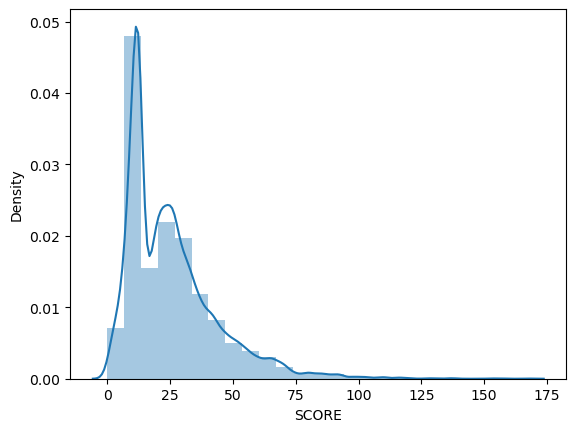

In [22]:
sns.distplot(df['SCORE'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [23]:
df['SCORE'].mean() # Check the mean

25.416283992028816

In [24]:
df['SCORE'].median() # Check the median

21.0

In [25]:
df['SCORE'].max() # Check the max

168.0

# Data Prep for Regression Analysis

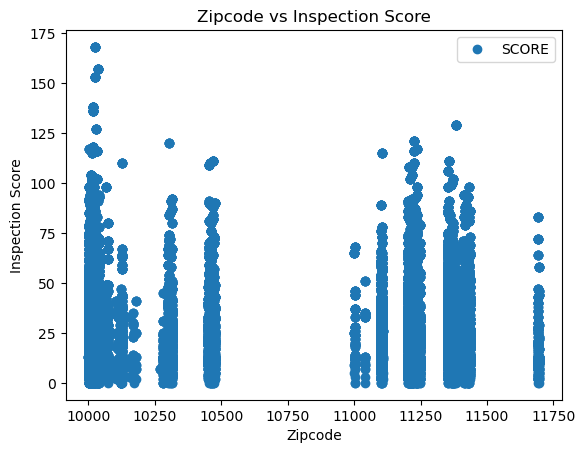

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'ZIPCODE', y='SCORE',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Zipcode vs Inspection Score')
plt.xlabel('Zipcode')
plt.ylabel('Inspection Score')
plt.show()

## Hypothesis: As zipcodes increase, inspection scores decrease.

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['ZIPCODE'].values.reshape(-1,1)
y = df['SCORE'].values.reshape(-1,1)

In [31]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [32]:
# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [33]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00139697]]
Mean squared error:  325.33364633495546
R2 score:  0.002102970952518657


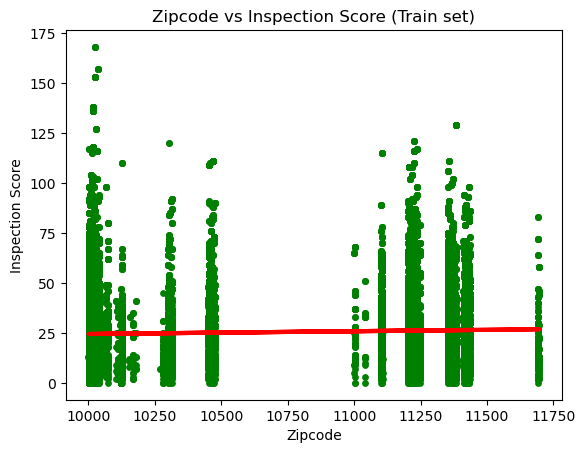

In [42]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Zipcode vs Inspection Score (Train set)')
plot_test.xlabel('Zipcode')
plot_test.ylabel('Inspection Score')
plot_test.show()

### Prediction: Because the mean squared error is high and R2 score is close to 0, this linear regression will not be a good fit for the test set.

In [34]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

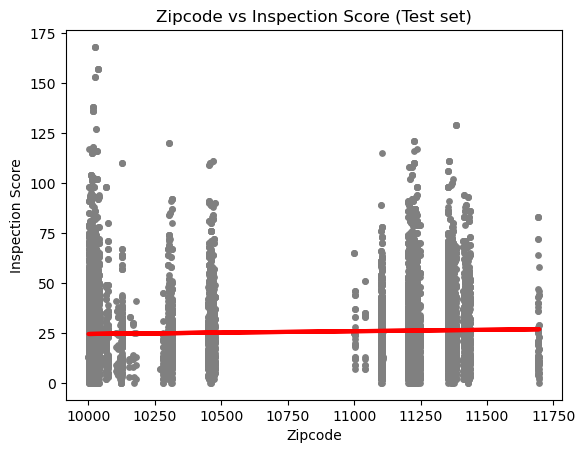

In [35]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Zipcode vs Inspection Score (Test set)')
plot_test.xlabel('Zipcode')
plot_test.ylabel('Inspection Score')
plot_test.show()

### The line does not fit the data well. There does not seem to be a linear relationship between zipcodes and inspection scores.

In [36]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
    
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00139697]]
Mean squared error:  329.33924560504244
R2 score:  0.0019045610425703074


In [38]:
# Create a dataframe comparing the actual and predicted values of y.
    
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,43.0,25.123885
1,43.0,24.513408
2,13.0,24.474292
3,11.0,26.381162
4,49.0,26.149265
5,10.0,24.491056
6,111.0,26.354620
7,34.0,26.152059
8,22.0,24.507820
9,39.0,25.104328


## Thoughts/Reflections:
### I did not expect there to be a strong relationship given the past analysis of the data, but I was surprised that the R2 value was 0.002 and MSE was 329.34 given that a majority of high scores were concentrated in the lower zipcodes (Manhattan). I do not think this result is biased but it does show that zipcode is not an influential factor in calculating inspection scores.